# Supplement: Triangle counting using NetworkX

You can also count triangles using [NetworkX](https://networkx.github.io/), which is one of the _de facto_ standard libraries for graph computations in Python. This notebook contains some code to do so. It is intended as a companion to the notebook on a [matrix-based triangle counting method](./005-tricount3.ipynb), which we will assume you have looked through already. This notebook provides a "slow" baseline method and dumps some auxiliary data to disk, which the matrix-based notebook can use for testing.

The following cell uses NetworkX to create a simple undirected graph, render it visually, and then count its triangles.

This graph has 2 triangles:
Node-triangle occurrence counts: {0: 2, 1: 1, 2: 0, 3: 2, 4: 0, 5: 1}


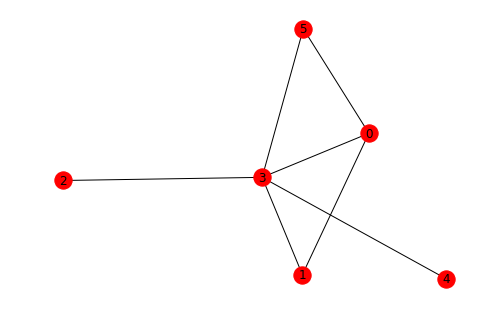

In [1]:
import networkx
%matplotlib inline

V = list(range(6))
E = [(0, 1), (0, 3), (0, 5), (1, 3), (5, 3), (3, 2), (3, 4)]
G = networkx.Graph()
G.add_nodes_from(V)
G.add_edges_from(E)

def count_triangles_nx(G, ret_tricounts=False):
    """
    Given a NetworkX graph, `G`, this function returns the total number of
    triangles it contains. If the argument `ret_C=True`, then it also returns
    a dictionary where each (key, value) pair is the vertex and the number of
    triangles that include that vertex.
    """
    from networkx.algorithms.cluster import triangles
    tricounts = triangles(G)
    n_tri = sum(tricounts.values()) // 3
    if ret_tricounts:
        return n_tri, tricounts
    return n_tri

networkx.draw(G, with_labels=True)
ntri_G, tricounts_G = count_triangles_nx(G, ret_tricounts=True)
print("This graph has {} triangles:".format(ntri_G))
print("Node-triangle occurrence counts:", tricounts_G)

## Tests on the actor network dataset

Let's test the performance of the NetworkX code using data collected on a crawl of the [Top 250 movies on the Internet Movie Database](https://github.com/napsternxg/IMDB-Graph/tree/master/Data/tutorial/tutorial) (circa 2012).

> These data should be available in the repository containing this notebook. However, an additional copy is available at the following URL, but you may need to adapt the code below to use it. https://cse6040.gatech.edu/datasets/imdb.zip

In [2]:
import json

def fn(fn_base, dirname='./imdb/'):
    return "{}{}".format(dirname, fn_base)

def load_json(basefile):
    filename = fn(basefile)
    json_file = open(filename, encoding="utf8")
    json_str = json_file.read()
    json_data = json.loads(json_str)
    return json_data

movies_json = load_json("imdb.json")
casts_json = load_json("imdb_cast.json")

**About the data.** There are two parts to the data.

The first is `movies_json`, which is a JSON formatted collection of movie titles and IDs. It is a list and here are the first few entries:

In [3]:
print("=== First five entries of `movies_json` ===\n")
for k, m in enumerate(movies_json[:5]):
    print("[{}] {}".format(k, m))
print("...")

=== First five entries of `movies_json` ===

[0] {'link': ['/title/tt0111161/'], 'name': ['The Shawshank Redemption']}
[1] {'link': ['/title/tt0068646/'], 'name': ['The Godfather']}
[2] {'link': ['/title/tt0071562/'], 'name': ['The Godfather: Part II']}
[3] {'link': ['/title/tt0110912/'], 'name': ['Pulp Fiction']}
[4] {'link': ['/title/tt0060196/'], 'name': ['The Good, the Bad and the Ugly']}
...


The second part is `casts_json`, which is a JSON formatted collection of movies with information about who appeared in the movie. It is also a list and here is the very first element.

Observe that it is a dictionary with information about a single movie, including the movie's title, it's IMDB URL, and list of actors (cast members).

In [4]:
print("=== First entry of `casts_json` ===\n")
print(json.dumps(casts_json[0], indent=3))

=== First entry of `casts_json` ===

{
   "movie": {
      "url": "http://www.imdb.com/title/tt0050083/fullcredits",
      "name": [
         "12 Angry Men (1957) - Full cast and crew"
      ]
   },
   "rank": 1,
   "cast": [
      {
         "link": [
            "/name/nm0000842/"
         ],
         "name": [
            "Martin Balsam"
         ]
      },
      {
         "link": [
            "/name/nm0275835/"
         ],
         "name": [
            "John Fiedler"
         ]
      },
      {
         "link": [
            "/name/nm0002011/"
         ],
         "name": [
            "Lee J. Cobb"
         ]
      },
      {
         "link": [
            "/name/nm0550855/"
         ],
         "name": [
            "E.G. Marshall"
         ]
      },
      {
         "link": [
            "/name/nm0001430/"
         ],
         "name": [
            "Jack Klugman"
         ]
      },
      {
         "link": [
            "/name/nm0083081/"
         ],
         "name": [
    

**Extracting a list of actors.** Given the `casts_json` list, the `gather_actors()` function returns a dictionary that maps actor links to actor names.

In the example above, the first actor listed for "12 Angry Men" is `"Martin Balsam"`, whose link is `"/name/nm0000842/"`. Therefore, the dictionary that your function returns should include the key-value pair, `"/name/nm0000842/" : "Martin Balsam"`.

This function will help us inspect the ultimate analysis output.

In [5]:
def gather_actors(casts):
    actors = dict() # Use to store (actor link) : (actor name) pairs
    for movie in casts:
        assert "cast" in movie
        for actor in movie["cast"]:
            link = actor["link"][0]
            name = actor["name"][0]
            actors[link] = name
    return actors

actors = gather_actors(casts_json)
print("Found {} unique actors.\n".format(len(actors)))

assert "/name/nm0000842/" in actors
print("'{}' -> '{}'".format("/name/nm0000842/", actors["/name/nm0000842/"]))
assert actors["/name/nm0000842/"] == "Martin Balsam"

Found 12975 unique actors.

'/name/nm0000842/' -> 'Martin Balsam'


The following cell is just a unit-test for `gather_actors()`.

In [6]:
# Test cell: `gather_actors_test`

assert ("/name/nm0872820/" in actors) and (actors["/name/nm0872820/"] == "Amedeo Trilli")
assert ("/name/nm0279786/" in actors) and (actors["/name/nm0279786/"] == "Shug Fisher")
assert ("/name/nm0802831/" in actors) and (actors["/name/nm0802831/"] == "Tony Sirico")
assert ("/name/nm0924692/" in actors) and (actors["/name/nm0924692/"] == "Dean White")
assert ("/name/nm0248074/" in actors) and (actors["/name/nm0248074/"] == "Jake Eberle")
assert ("/name/nm1067542/" in actors) and (actors["/name/nm1067542/"] == "Grace Keller")
assert ("/name/nm0903694/" in actors) and (actors["/name/nm0903694/"] == "Carl Voss")
assert ("/name/nm1504897/" in actors) and (actors["/name/nm1504897/"] == "Radka Kucharova")
assert ("/name/nm0644905/" in actors) and (actors["/name/nm0644905/"] == "Tae-kyung Oh")
assert ("/name/nm0727037/" in actors) and (actors["/name/nm0727037/"] == "Gary Riley")
assert ("/name/nm2006011/" in actors) and (actors["/name/nm2006011/"] == "Glenn Stanton")
assert ("/name/nm0193389/" in actors) and (actors["/name/nm0193389/"] == "John Curtis")
assert ("/name/nm0829189/" in actors) and (actors["/name/nm0829189/"] == "Avril Stewart")
assert ("/name/nm1211469/" in actors) and (actors["/name/nm1211469/"] == "Karine Asure")
assert ("/name/nm0598388/" in actors) and (actors["/name/nm0598388/"] == "Jacques Monod")
assert ("/name/nm1663820/" in actors) and (actors["/name/nm1663820/"] == "Michael Garnet Stewart")
assert ("/name/nm0009388/" in actors) and (actors["/name/nm0009388/"] == "Khosrow Abrishami")
assert ("/name/nm0020513/" in actors) and (actors["/name/nm0020513/"] == "Fletcher Allen")
assert ("/name/nm0615419/" in actors) and (actors["/name/nm0615419/"] == "John Murtagh")
assert ("/name/nm0120165/" in actors) and (actors["/name/nm0120165/"] == "Keith S. Bullock")
assert ("/name/nm0448560/" in actors) and (actors["/name/nm0448560/"] == "Colin Kenny")
assert ("/name/nm0882139/" in actors) and (actors["/name/nm0882139/"] == "David Ursin")
assert ("/name/nm1597244/" in actors) and (actors["/name/nm1597244/"] == "Carol Meirelles")
assert ("/name/nm0316079/" in actors) and (actors["/name/nm0316079/"] == "Paul Giamatti")
assert ("/name/nm3546231/" in actors) and (actors["/name/nm3546231/"] == "Leonard B. John")

print("\n(Passed!)")


(Passed!)


**Using NetworkX to count the triangles.** Let's define the actor network graph as follows. Each actor is a node; an edge exists between two actors if they appeared in the same movie.

Convince yourself that the following implementation computes the triangles correctly, assuming the NetworkX implementation is correct.

In [7]:
def build_actor_network(casts):
    from itertools import combinations
    actors = gather_actors(casts)
    G = networkx.Graph()
    G.add_nodes_from(actors.keys())
    for movie in casts:
        for ai, aj in combinations(movie["cast"], 2):
            G.add_edge(ai['link'][0], aj['link'][0])
    return G

G_casts = build_actor_network(casts_json)
ntri_nx, tricounts_nx = count_triangles_nx(G_casts, ret_tricounts=True)
print("Found ~ {:.1f} million triangles in all.".format(ntri_nx*1e-6))

Found ~ 24.6 million triangles in all.


And, let's measure how fast it is:

In [8]:
t_nx = %timeit -o count_triangles_nx(G_casts)

16.2 s ± 294 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%load_ext line_profiler
profile = %lprun -r -u 1.0 -f count_triangles_nx count_triangles_nx(G_casts)
profile.print_stats()

Timer unit: 1e-06 s

Total time: 18.9066 s
File: <ipython-input-1-1a18f48e041f>
Function: count_triangles_nx at line 10

Line #      Hits         Time  Per Hit   % Time  Line Contents
    10                                           def count_triangles_nx(G, ret_tricounts=False):
    11                                               """
    12                                               Given a NetworkX graph, `G`, this function returns the total number of
    13                                               triangles it contains. If the argument `ret_C=True`, then it also returns
    14                                               a dictionary where each (key, value) pair is the vertex and the number of
    15                                               triangles that include that vertex.
    16                                               """
    17         1         18.0     18.0      0.0      from networkx.algorithms.cluster import triangles
    18         1   18906475.0 18906

**Data export.** Lastly, let's dump this dataset to disk.

In [10]:
from scipy.sparse import save_npz
from pickle import dump

V_actors = list(G_casts.nodes())
A_casts = networkx.convert_matrix.to_scipy_sparse_matrix(G_casts, nodelist=V_actors)

with open('imdb_tricounts.pickle', 'wb') as fp:
    dump(ntri_nx, fp)
with open('imdb_tricounts_matrix.pickle', 'wb') as fp:
    dump(tricounts_nx, fp)
with open('imdb_actors.pickle', 'wb') as fp:
    dump(V_actors, fp)
save_npz("imdb_matrix.npz", A_casts)

In [11]:
!ls -al imdb*.pickle imdb*.npz

-rw-r--r--  1 richie  staff  336617 Jul 17 13:43 imdb_actors.pickle
-rw-r--r--  1 richie  staff  267778 Jul 17 13:43 imdb_matrix.npz
-rw-r--r--  1 richie  staff       8 Jul 17 13:43 imdb_tricounts.pickle
-rw-r--r--  1 richie  staff  375204 Jul 17 13:43 imdb_tricounts_matrix.pickle


**Fin!** We hope this notebook has been a useful tutorial of how to use Intrepydd's sparse matrix operations, in the context of implementing graph algorithms that exploits the duality between a sparse matrix and a sparse graph.